# Lab Exersice 2
*Author: Jakob Heller, Steffen Steiner, Clemens Konrad Müller* 


## Exercise 1: Signals for excitation, spectra and signal parameters
For the sampling frequency 48 kHz, three different time-discrete signals of length N = $96001$
samples shall be generated: white noise, pink noise and a sine signal. The signal characteristics
and dierent presentations of their spectra are to be compared.
* a) Generate (e.g. in Matlab) a sine signal sn with the frequency $f = 1$ kHz and the above specied sampling rate and length. The amplitude of the sine signal shall be 1.

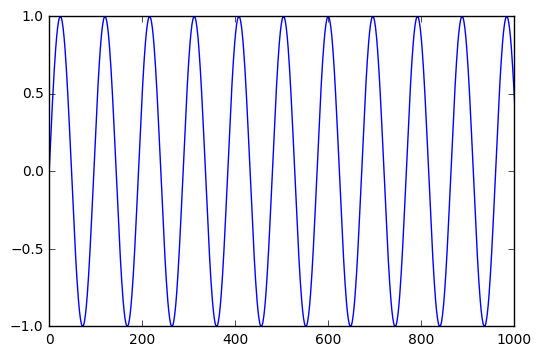

In [1]:
%matplotlib inline 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# generate the 3 frequencies
f1=1000 # Hz
fs=48000 #Hz

# Range
N=96001 #int

#maximum amplitude
maxamp=1

#k=kappa the time domain index (array from 0 to Range in N/fs steps)
k = np.arange(N)

#create sines
sn = maxamp * np.sin(2 * np.pi * f1 * k/(2*fs))

plt.plot(k,sn)
plt.axis([0, 1000, -1, 1]);

* b) Generate a white noise wn with a normally distributed probability density function with the above specified sampling rate and length.

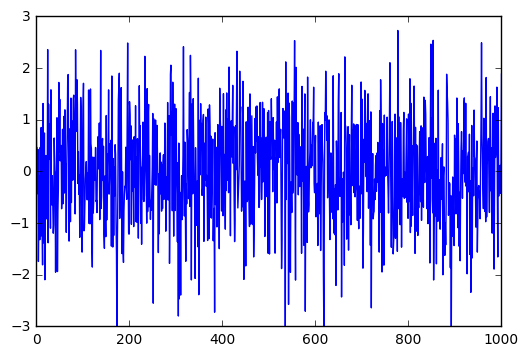

In [2]:
wn =  np.random.normal(0, 1 , N)
plt.plot(k,wn)
plt.axis([0, 1000, -3, 3]);

* c) Generate a pink noise pn with an energy distribution that is proportional to $1/f$ with the above specified sampling rate and length. To this end perform the following steps:
* Calculate the complex spectrum WN of wn with an FFT.
* Generate the vector PNAmpl for the amplitude characteristic $1/\sqrt{f}$ . Pay attention to the position of frequencies in the FFT data.
* Apply the pink noise characteristic PNAmpl to the spectrum WN by multiplication. Set the amplitude for f = 0 Hz to zero in the resulting spectrum (i.e. there shall be no direct component).
* Generate the complete spectrum PN that exhibits even symmetry for amplitude and odd symmetry for phase (i.e. the right-sided spectrum is the complex conjugate of the left-sided spectrum) so that after an inverse FFT a real pink noise pn results. Pay attention to the frequency positions in an FFT spectrum of odd length.

In [3]:
WN = np.fft.fft(wn, N) #WF in this notation we use Majuskels for spectre domain #The lenght of the DTFT is N

/home/jakob/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/jakob/.local/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jakob/.local/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


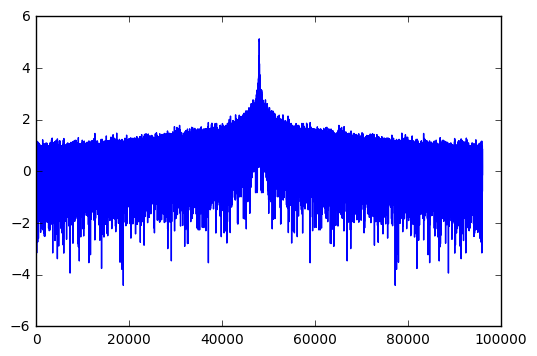

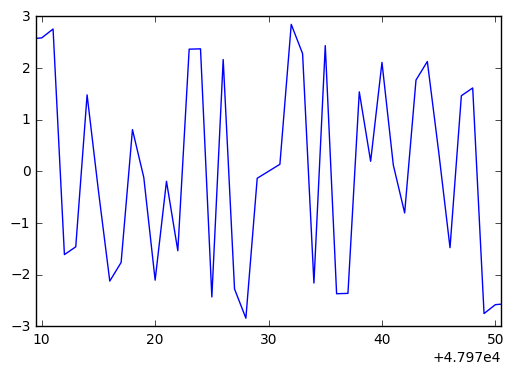

In [4]:
PNAmpl=np.ones(N)
PNAmpl[1:((N/2))]=PNAmpl[1:((N/2))]/(np.sqrt(k[1:((N/2))])) #shaping the vector accordingto the given characteristics leaving out the first one
#as it would give us Division with 0
PNAmpl[0]=0 #setting the first value 0
kflip=k[::-1] 
PNAmpl[((N/2)):(N-1)]=PNAmpl[(N/2):(N-1)]/(np.sqrt((kflip[(N/2):(N-1)])))

PN=((PNAmpl*(WN))) #applying the amplitude vector to the shifted white noise
#and shifting the results back
#plt.plot((k),np.log10(np.abs(PN)))
plt.plot(k,2*np.log10(np.fft.fftshift(np.abs(PN))))
plt.figure()
plt.plot(k, (np.fft.fftshift(np.angle(PN))))
plt.axis([(N/2)-21, (N/2)+20, -3, 3]); #this plot should be odd symetric 

pn=np.fft.ifft(PN , N)

d) Ensure that the generated signals sn , wn and pn are zero-mean

In [5]:
sn_mf=sn-np.mean(sn) #we ensure that the signal is mean free by subtracting the mean of the function
wn_mf=wn-np.mean(wn)
pn_mf=pn-np.mean(pn)

e) Normalise all signals so that they have a root mean square value of $−3$ dBFS RMS .
* Hier vielleciht nochmal die Formel rein

In [6]:
def normalisedRMS(f):
    N=len(f)
    f_RMS=np.std(f)
    return f*((10**(-3/20))/f_RMS)

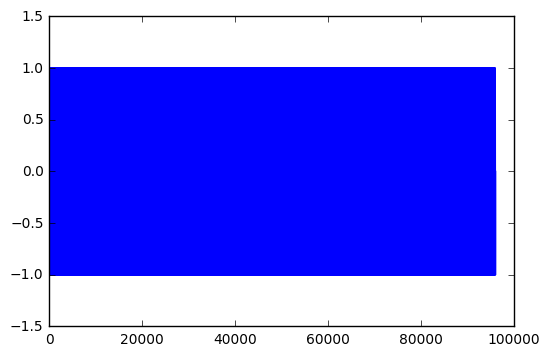

In [7]:
plt.plot(k, normalisedRMS(sn_mf))

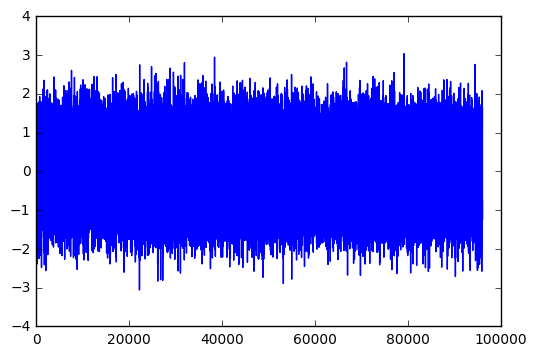

In [8]:
plt.plot(k, normalisedRMS(wn_mf))

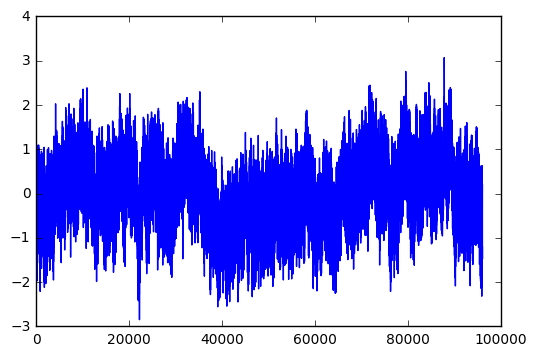

In [9]:
plt.plot(k, normalisedRMS(pn_mf.real))

f) State the peak value in dBFS PEAK and the crest factor in dB for all signals.

In [10]:
sn_peak=20*np.log10(max(np.abs(sn_mf)))
wn_peak=20*np.log10(max(np.abs(wn_mf)))
pn_peak=20*np.log10(max(np.abs(pn_mf)))
print("peak-values")
print(sn_peak , wn_peak , pn_peak)
sn_cf=sn_peak-(3)
wn_cf=wn_peak-(3)
pn_cf=pn_peak-(3)
print("crest-factors")
print(sn_cf , wn_cf, pn_cf)

peak-values
1.92865493311e-15 12.6977188794 -22.8089110565
crest-factors
-3.0 9.6977188794 -25.8089110565


g) Plot the spectrum as it would be displayed by an FFT analyser: Calculate the complex spectra for all three signals with an FFT and plot the absolute magnitude spectra that are normalised to sine amplitudes with $2/N$ in dBFSPEAK over logarithmic frequencies $1Hz < f < fs/2$. Pay attention to correct labelling of the axes and use a legend.

In [11]:
SN_MF = np.fft.fft(sn_mf)
WN_MF = np.fft.fft(wn_mf)
PN_MF = np.fft.fft(pn_mf)

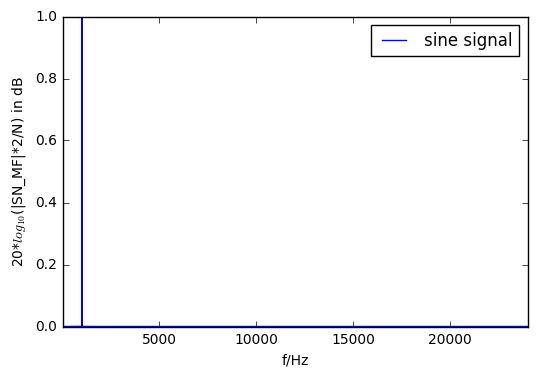

In [12]:
plt.plot((np.abs(SN_MF*2/N)),label='sine signal')
plt.axis([1, fs/2,0,1]);
plt.ylabel(r'20*$log_{10}$(|SN_MF|*2/N) in dB')
plt.xlabel(r'f/Hz')
plt.legend();

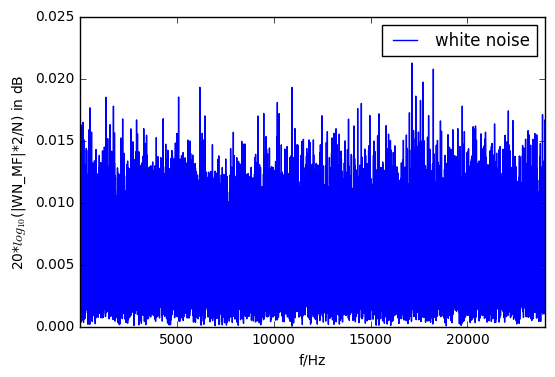

In [13]:
plt.plot((np.abs(WN_MF*2/N)),label='white noise')
plt.axis([1, fs/2,0,0.025]);
plt.ylabel(r'20*$log_{10}$(|WN_MF|*2/N) in dB');
plt.xlabel(r'f/Hz');
plt.legend();

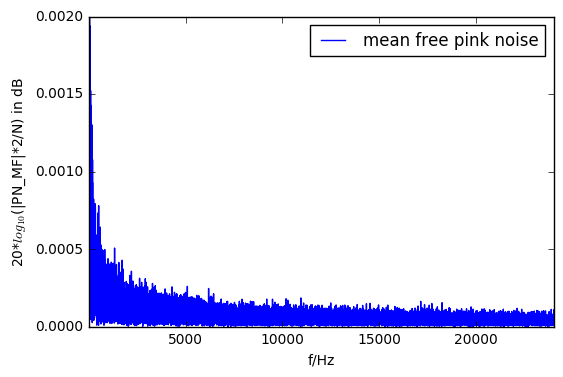

In [34]:
plt.plot((np.abs(PN_MF*2/N)),label='mean free pink noise')
plt.axis([1, fs/2,0,0.002]);

plt.ylabel(r'20*$log_{10}$(|PN_MF|*2/N) in dB');
plt.xlabel(r'f/Hz');
plt.legend();

h) Plot the spectrum as it would be displayed by a Real-time analyser (RTA): Simulate how an RTA with octave band ltering would calculate and display the spectra.

In [29]:
def rta(X,fl,fh,nfft,fs):
    #find out indices
    mulow = [ round(elem*N/fs) for elem in fl]
    muhi = [ round(elem*N/fs) for elem in fh]
    #X_shifted = np.fft.fftshift(X)
    sequence = range(0,len(fl)-1)
    dBFS_peak = np.zeros(len(fl))
    for i in sequence:
        dBFS_peak[i]=20*np.log10(np.sqrt(np.sum(np.abs(X[mulow[i]:muhi[i]]*2/nfft)**2)))
    return dBFS_peak 

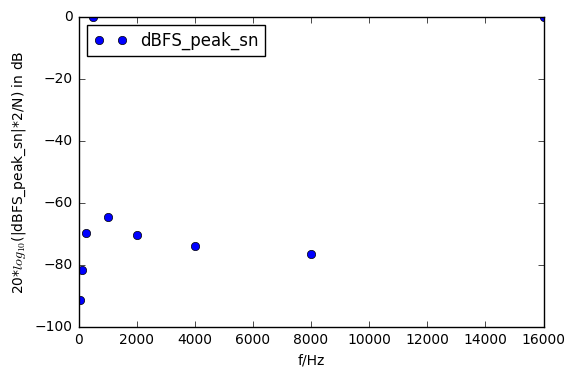

In [35]:
fl = [44.194, 88.388, 176.78, 353.55, 707.11, 1414.2, 2828.4, 5656.9, 11314]
fh = [88.388, 176.78, 353.55, 707.11, 1414.2, 2828.4, 5656.9, 11314, 22627]
cf = [62.5, 125, 250, 500, 1000, 2000, 4000, 8000, 16000] 
dBFS_peak_sn = rta(SN_MF,fl,fh,N,fs);
plt.plot(cf,dBFS_peak_sn,'bo',label='dBFS_peak_sn');
#plt.axis([1, fs/2,-80,0]);
plt.ylabel(r'20*$log_{10}$(|dBFS_peak_sn|*2/N) in dB');
plt.xlabel(r'f/Hz');
plt.legend(loc='upper left');

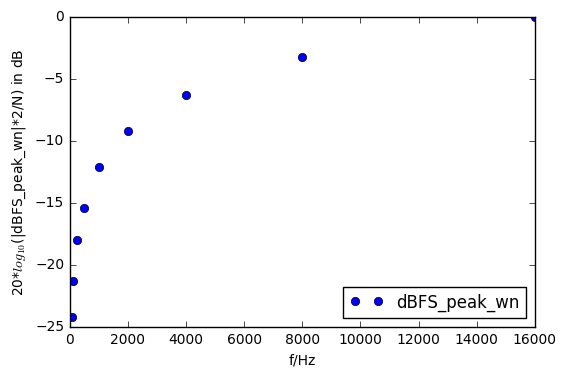

In [41]:
dBFS_peak_wn = rta(WN_MF,fl,fh,N,fs);
plt.plot(cf,dBFS_peak_wn,'bo',label='dBFS_peak_wn');
#plt.axis([1, fs/2,-80,0]);
plt.ylabel(r'20*$log_{10}$(|dBFS_peak_wn|*2/N) in dB');
plt.xlabel(r'f/Hz');
plt.legend(loc='lower right');

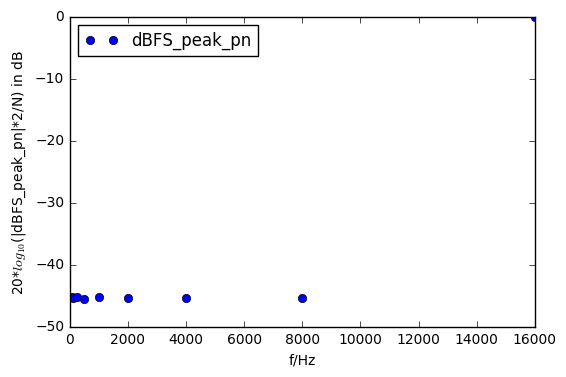

In [44]:
dBFS_peak_pn = rta(PN_MF,fl,fh,N,fs);
plt.plot(cf,dBFS_peak_pn,'bo',label='dBFS_peak_pn');
#plt.axis([1, fs/2,-150,0]);
plt.ylabel(r'20*$log_{10}$(|dBFS_peak_pn|*2/N) in dB');
plt.xlabel(r'f/Hz');
plt.legend(loc='upper left');

i) Explain why the spectra of the two diagrams from g) and h) have to be interpreted differently.
* The difference between g) and h) is that in h) filters of finite length are used, wereas in g) the filters are in theory infinitisimal. In h) there is avaraging over the filter FFT-coefficients while there is none in g). Another difference is that the width of the filters in h) is not constant, wereas in g) it is are because the filters have infinitisimal width.

# Exercise 2: Transfer function with FFT deconvolution

a) Load the sine sweep Emphasis_FFT18_48K.wav that is available for download into Matlab, construct a two-channel vector xi from it and generate the output signals [xosys,xo] by calling the function sys.p (have a look at the le sys_help.m for usage of the function). Hint: Adopt the sampling frequency of the WAV file.


In Matlab... extra file